Basic Image Manipulations

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [23]:
def download_and_unzip(url, folder):
    print(f"Downloading and extracting assests...", end="")

    urlretrieve(url, folder)

    try:
        with ZipFile(folder) as z:
            z.extractall(os.path.split(folder)[0])

        print("done")

    except Exception as e:
        print("\nINvalid file.",e)

URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

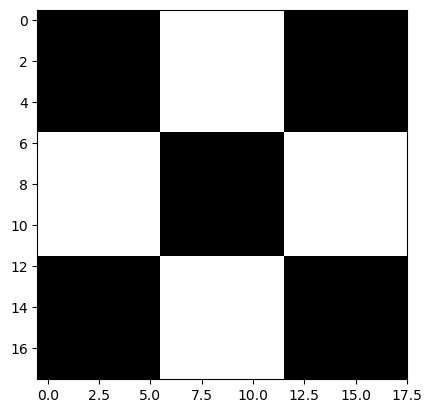

In [24]:
cb_img = cv2.imread("checkerboard_18x18.png", 0)
plt.imshow(cb_img, cmap="gray")
print(cb_img)
plt.show()

Accessing individual pixels:

In [25]:
print(cb_img[0, 0])
print(cb_img[0,6])

0
255


Modifying image pixels:

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

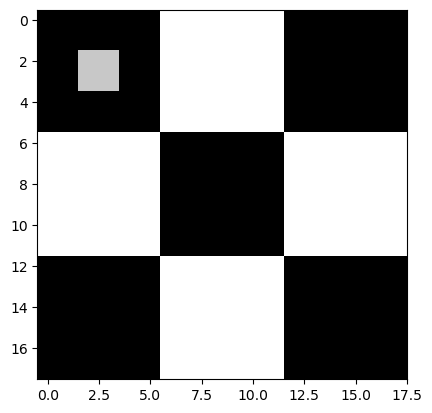

In [26]:
cb_img_copy = cb_img.copy()
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200

#you can also do...
#cb_img_copy[2:3, 2:3] = 200

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)
plt.show()

Cropping Images:

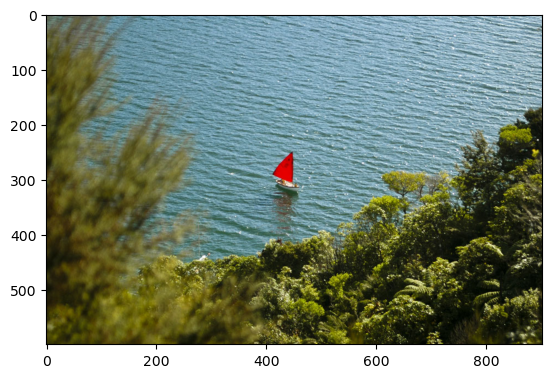

In [27]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)
plt.show()

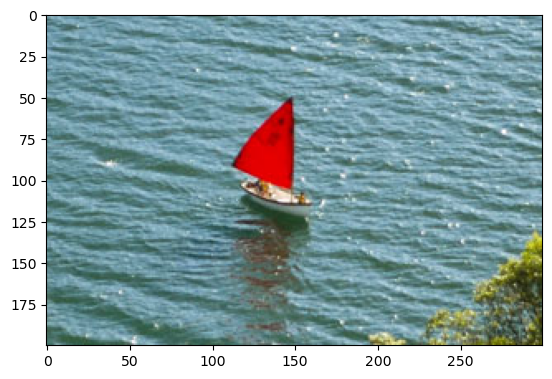

In [28]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)
plt.show()

Resizing Images:

dst = resize( src, dsize[, dst[, fx[, fy[, 
interpolation]]]])

dst: output image
src: input image
dsize: output image size
fx: Scale factor along the horiziontal axis; when equal to 0, it is computed as (double)dsize.width/src.cols
fy: Scale factor along the vertical axis; when equal to 0, it is computed as (double)dsize.height/src.rows

The output image has size dsize (when non-zero) or the size from src.size(), fx, and fy; the type of dst is the same as the src.

Method 1: Specifying Scaling Factor using fx and fy

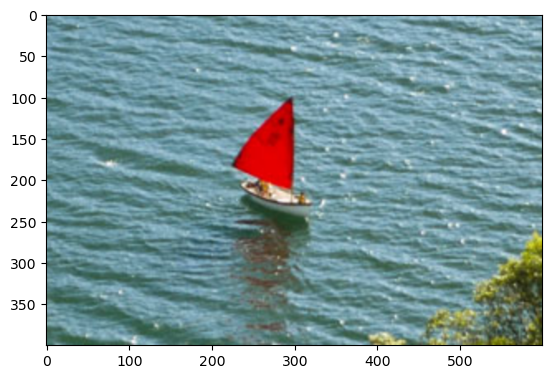

In [29]:
resize_cropped_region_2x = cv2.resize(cropped_region, None, fx= 2, fy=2)
plt.imshow(resize_cropped_region_2x)
plt.show()

Note:
Interpolation is basically setting an Interpolation algorithm to resize the image.

When the dsize image is greater than the src image, the function stretches out the image so it fits the dsize image.

Method 2: Specifying exact size of the output image

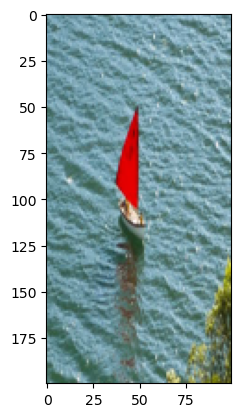

In [30]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)
plt.show()


Resize while maintaining aspect ratio:

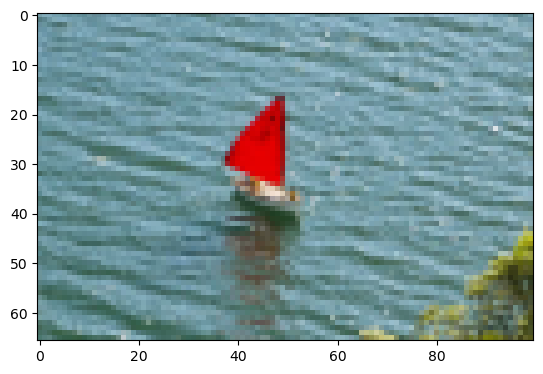

In [31]:
desired_wridth = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)
plt.show()


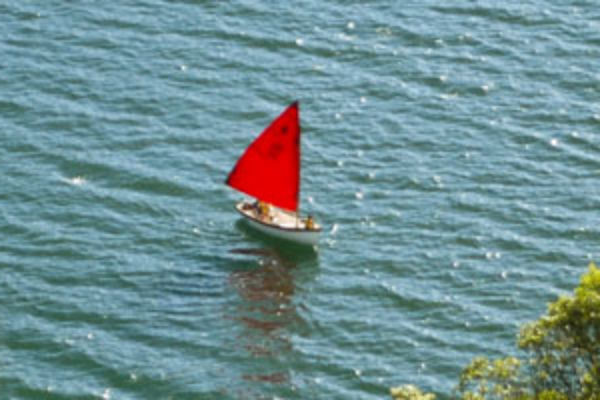

In [32]:
resized_cropped_region_2x = resize_cropped_region_2x[:,:,::-1]
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)
Image(filename="resized_cropped_region_2x.png")

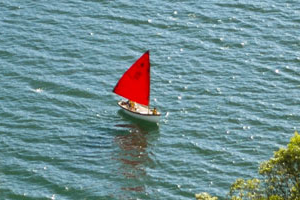

In [33]:
cropped_region = cropped_region[:,:,::-1]
cv2.imwrite("cropped_region.png", cropped_region)
Image(filename="cropped_region.png")

Flipped Images:

dst = cv.flip( src, flipCode)
dst: output array of the same size and type as src

src: input image
flipCode: a flag to specify how to flip the array;
0 means flipping arround the x-axis,
positive value means flipping around y-axis,
negative value means flipping around both axes

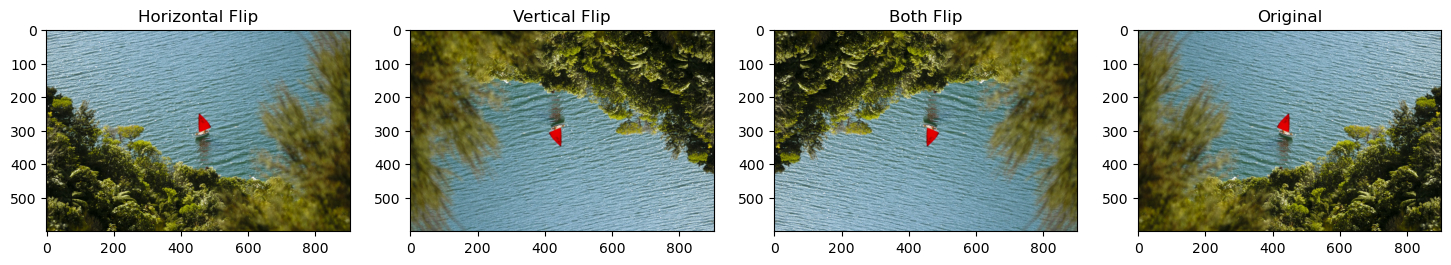

In [35]:
img_NZ_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_flipped_both = cv2.flip(img_NZ_rgb, -1)

plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_NZ_flipped_horz);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(img_NZ_flipped_vert);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(img_NZ_flipped_both);plt.title("Both Flip")
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original")
plt.show()